In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import tensorflow as tf

print("Available devices:", tf.config.list_physical_devices())
print("GPU Available:", tf.test.is_gpu_available())   # For TF < 2.11
print("GPU Device Name:", tf.test.gpu_device_name())


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: True
GPU Device Name: /device:GPU:0


I0000 00:00:1759749144.197169    1577 gpu_device.cc:2020] Created device /device:GPU:0 with 1765 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1759749144.199314    1577 gpu_device.cc:2020] Created device /device:GPU:0 with 1765 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
tf.test.is_built_with_cuda()

True

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

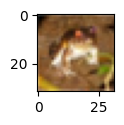

In [16]:
plot_sample(0)

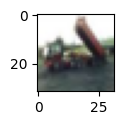

In [18]:
plot_sample(2)

In [22]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [23]:
classes[y_train[3][0]]

'deer'

In [69]:
x_train_scaled = x_train.astype('float32') / 255.0
x_test_scaled  = x_test.astype('float32') / 255.0

In [70]:
x_train_scaled

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [71]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [72]:
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

y_train_categorical = y_train_categorical.astype('float32')
y_test_categorical = y_test_categorical.astype('float32')

In [73]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),  #Flatten the image into one single arrray
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation="sigmoid")   
])
model.compile(optimizer= 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [74]:
model.fit(x_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50


2025-10-06 13:24:53.068031: I external/local_xla/xla/service/service.cc:163] XLA service 0x7c3b40006750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-06 13:24:53.068071: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-10-06 13:24:53.109968: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-06 13:24:53.205461: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91301
2025-10-06 13:24:53.237899: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-10-06 13:24:53.237952: I e

  33/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1315 - loss: 2.3020

I0000 00:00:1759757097.951818    4286 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3058 - loss: 1.9307

2025-10-06 13:25:06.842061: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 8 bytes spill stores, 8 bytes spill loads

2025-10-06 13:25:07.342909: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 8 bytes spill stores, 8 bytes spill loads

2025-10-06 13:25:07.366348: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_214', 16 bytes spill stores, 16 bytes spill loads



1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3547 - loss: 1.8138
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4254 - loss: 1.6263
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4566 - loss: 1.5412
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4768 - loss: 1.4808
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4966 - loss: 1.4303
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5119 - loss: 1.3902
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5253 - loss: 1.3512
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5374 - loss: 1.3150
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5470 - loss: 1.2843
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5619 - loss: 1.2524
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5701 - loss: 1.2239
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━

In [75]:
classes[y_test[0][0]]

'cat'

In [78]:
classes[np.argmax(model.predict(x_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'cat'

In [79]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'ship'

In [86]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),  #Flatten the image into one single arrray
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation="sigmoid")   
        ])
    model.compile(optimizer= 'SGD',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model
        

In [87]:
import time

In [88]:
start = time.time()

with tf.device('/CPU:0'):
    cpu_model = get_model()  # your model function
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10, batch_size=32, verbose=1)

end = time.time()

Epoch 1/10


2025-10-06 13:41:58.118199: I external/local_xla/xla/service/service.cc:163] XLA service 0x7c3a0fbe1d10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-10-06 13:41:58.118223: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Host, Default Version


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3574 - loss: 1.8099
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4262 - loss: 1.6231
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4578 - loss: 1.5401
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4804 - loss: 1.4798
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.4959 - loss: 1.4318
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5134 - loss: 1.3875
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5271 - loss: 1.3516
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5391 - loss: 1.3165
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5507 - loss: 1.2811
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5629 - loss: 1.2508


In [94]:
print(f"CPU training time: {end - start:.2f} seconds")

CPU training time: 76.14 seconds


In [93]:
start1 = time.time()

with tf.device('/GPU:0'):
    cpu_model = get_model()  # your model function
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10, batch_size=32, verbose=1)

end1 = time.time()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3529 - loss: 1.8114
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4269 - loss: 1.6234
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4560 - loss: 1.5419
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4786 - loss: 1.4802
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4980 - loss: 1.4303
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5123 - loss: 1.3881
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5254 - loss: 1.3497
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5369 - loss: 1.3166
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5491 - loss: 1.2810
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5615 - loss: 1.2504


In [95]:
print(f"CPU training time: {end1 - start1:.2f} seconds")
print(f"CPU training time: {end - start:.2f} seconds")


CPU training time: 80.60 seconds
CPU training time: 76.14 seconds
